<a href="https://colab.research.google.com/gist/qbeer/370770dacb737a35fb06725b69a13c05/02_blank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning & clustering
----
### 1. Reading data
The worldbank_jobs_2016.tsv (can be found in the same folder with this notebook) file contains the Jobs (and other) data for the 2016 year, downloaded from The World Bank's webpage.

- Look at the data in any text editor. Build up an overall sense how the data is built up and how the missing values are represented.
- Read the file into a pandas dataframe and tell pandas the delimiter (or separator) that separates the columns and which special pattern means if a value is missing.
- Keep only those rows, which represents countries, at the end there are some useless rows (with missing country code).
- The data is in a long format. Convert it into a wide format, where each row is a single country (with country code) and the column names are the features i.e. the Series Codes, the values in the columns are the measured values of the 2016 [YR 2016 column]. (eg the first column is 'EG.CFT.ACCS.ZS', the second is 'EG.ELC.ACCS.ZS'. Order of the columns does not matter)! Try to use the pivot method.
- Check that the features are in numeric format (dtypes), this will be needed for modeling!


#### 1/a. Data loading, NaN row removal

In [173]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

import sys
import os

import seaborn as sns

In [209]:
#tabulator separated file, which has missing values that pandas inserts as NaNs
worldbank_data = pd.read_csv("02_dataset_worldbank_jobs_2016.tsv", delimiter="\t", na_values='..')
print(worldbank_data.columns)
print(pd.unique(worldbank_data["Country Name"]))           #let's see if these are like actual countries
print(pd.unique(worldbank_data["Country Code"]))           # country code could have been used to remove bad rows
worldbank_data1 = worldbank_data[:-5]                      #last 5 rows to be removed
print(~worldbank_data1.isna())
print(worldbank_data1.isna().sum())                        #this simply tells how many nans are in the data, remaining

#may become handy
features = {n : c for (n, c) in zip(worldbank_data['Series Code'],worldbank_data['Series Name'])}

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2016 [YR2016]'],
      dtype='object')
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czech Republic'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt, Arab Rep.' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'French

So it seems like that only the end has that couple rows that is unneeded. With the country code, that can be removed. The last 5 rows had to be removed. Due to only these rows being not data rows, they could be removed by just simply counting them.

After a quick revision, I see something like ".." in data which are NaNs actually -> fixed it, pandas.read_csv can handle predefined

#### 1/b. Long to wide dataformat

In [210]:
worldbank_data_wide = worldbank_data1.pivot(index="Country Name", columns="Series Code", values = "2016 [YR2016]") #my actual first successful pivot... i can feel its strength!
display(worldbank_data_wide)  #display as intelligent print

Series Code,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.POP.DNST,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,...,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.075895,1.182164e+08,0.480710,2.774835e+08,NaN,84.137138,NaN,53.083405,1.074215,3.051954,...,34656032.0,25985093.0,74.980,8670939.0,25.020,0.262056,185.045514,NaN,434.379370,NaN
Albania,0.059209,1.471281e+08,8.786734,9.960014e+08,NaN,100.000000,NaN,104.967190,33.806812,157.797944,...,2876101.0,1195854.0,41.579,1680247.0,58.421,2.941437,556.660364,11.178982,750.385083,0.647751
Algeria,0.029423,5.897023e+07,1.029475,1.696801e+07,NaN,99.439568,NaN,17.048895,8.668604,39.065192,...,40606052.0,11589373.0,28.541,29016679.0,71.459,5.181022,144.936023,93.992128,131.099918,0.343524
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277.995000,NaN,NaN,...,55599.0,7118.0,12.802,48481.0,87.198,NaN,44.999741,NaN,112.619116,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,164.427660,NaN,NaN,...,77281.0,9082.0,11.752,68199.0,88.248,NaN,149.884060,NaN,186.046284,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,100.000000,NaN,307.171429,NaN,NaN,...,107510.0,4859.0,4.520,102651.0,95.480,NaN,NaN,NaN,NaN,NaN
West Bank and Gaza,-0.335063,3.189228e+07,2.208254,2.010197e+08,25.250974,100.000000,NaN,756.074086,22.711191,134.124190,...,4551566.0,1109308.0,24.372,3442258.0,75.628,3.103988,132.926211,0.163516,199.093781,0.593923
"Yemen, Rep.",0.191607,NaN,-3.080162,NaN,NaN,71.642349,NaN,52.245796,NaN,NaN,...,27584213.0,17821057.0,64.606,9763156.0,35.394,NaN,11.129887,NaN,24.515813,NaN


#### 1/c. Numeric Dataformat

Don't really know whats going on here, but I am going to look into the value formats

In [211]:
type(worldbank_data_wide.loc["Hungary"][0]) == np.float64

True

Okey, let's go through the whole data...

In [212]:
array_copy = np.array(worldbank_data_wide).T     #copy and transpose
array_f_str_count = np.zeros(array_copy.shape[0])
for i,j in enumerate(array_copy):              #i am too used to for i in range(x_min,x_max): for j in range(y_min,y_max):
    array_f_str_count[i] = sum(1 for value in j if type(value)==str)
    
display(array_f_str_count)                       #so they seem like they are in the correct format

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

I don't think I need a conversion to numeric, but I will do it just get to know it.

In [213]:
for column in worldbank_data_wide.columns:
    worldbank_data_wide[column] = pd.to_numeric(worldbank_data_wide[column])

<font size="4"> My guess is that the many ".." are messing with datatypes and I added them as a NaN format to read_csv to load it as NaN, which is in float64, which is numeric. I really like how pleasently smart and easy it is.</font>

-----
### 2. Data preprocessing and inspection
- Visualize the missing values!
- Keep only those countries which has less than 60 missing features in the original table.
- After this drop all features which have missing values for the remaining countries. (Imputation would also work but may introduce a bias because there is less data for less developed countries generally.)
- How many counties and features do we have left?
- Read the kept features' descriptions. In the original table the Series Name describe the meaning of the features. What do you think, based only on these information, which counties are the most similar to Hungary? And Greece?

#### 2/a. Visualizing missing data

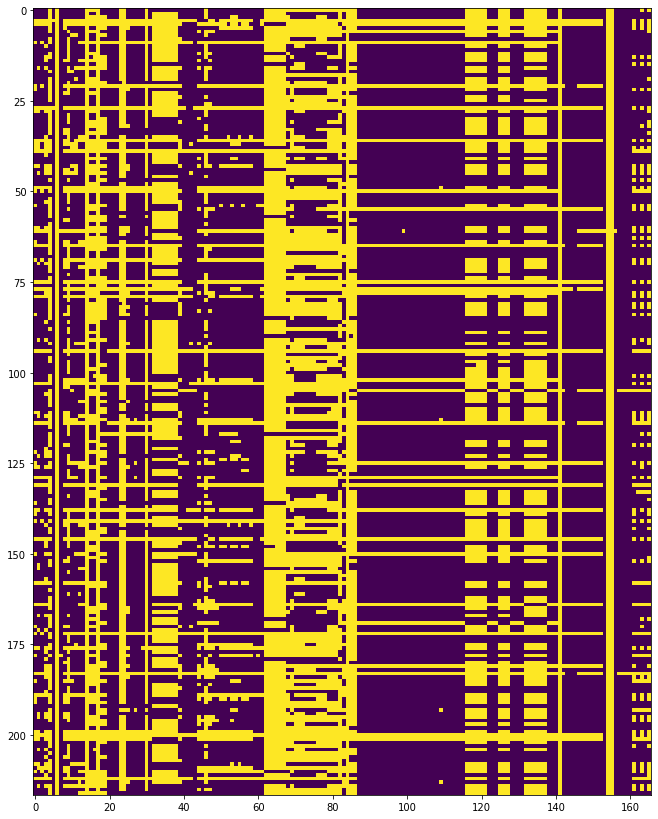

In [214]:
plt.figure(figsize=(166/15, 217/15))
im = plt.imshow(worldbank_data_wide.isna(), aspect='auto')
plt.show()

Okey, seems like there is a lot of missing data present. ONTO THE SORTING!
#### 2/b. Dropping rows with more than 60 missing values
pandas dropna helps me out here!

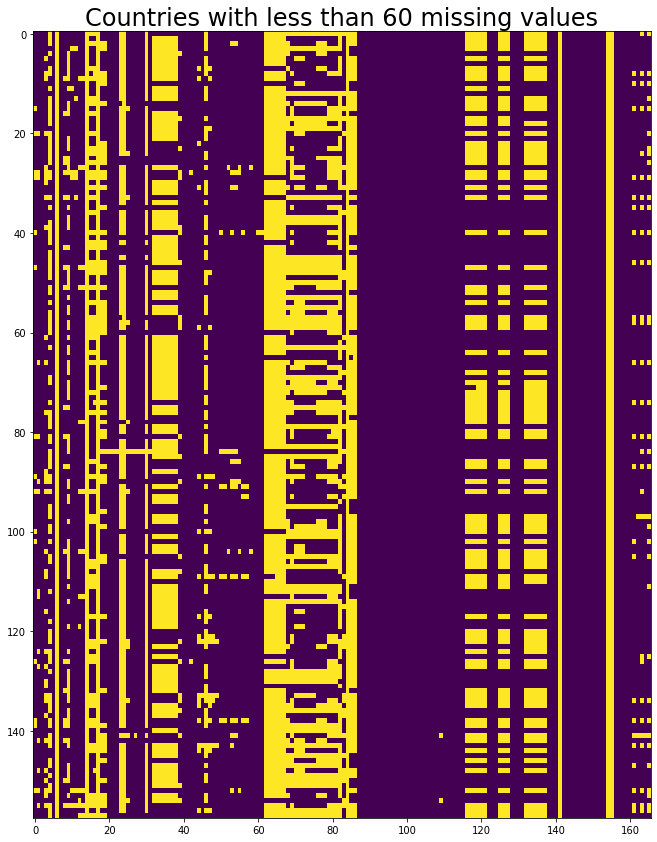

In [215]:
worldbank_data_wide_c = worldbank_data_wide.dropna(axis='rows', thresh=(166-60))
worldbank_data_wide_c

plt.figure(figsize=(166/15, 217/15))
plt.title("Countries with less than 60 missing values", fontsize=24)
im = plt.imshow(worldbank_data_wide_c.isna(), aspect='auto')
plt.show()

#### 2/c. Dropping features

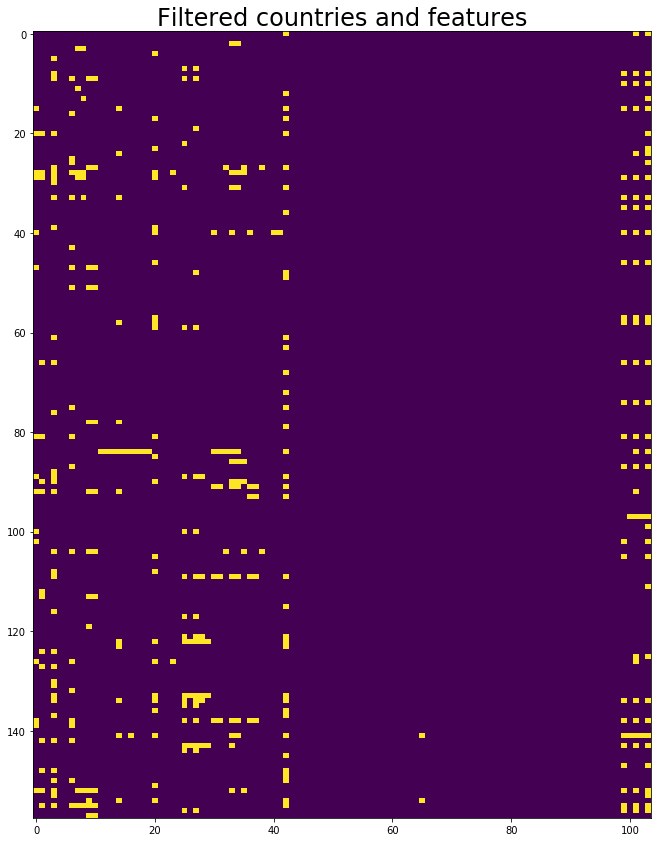

In [216]:
worldbank_data_wide_cnf = worldbank_data_wide_c.dropna(axis="columns", thresh=110)  #where to draw the threshhold is a mystery
plt.figure(figsize=(166/15, 217/15))
plt.title("Filtered countries and features", fontsize=24)
im = plt.imshow(worldbank_data_wide_cnf.isna(), aspect='auto')
plt.show()

So, it looks mostly clean. I had to try different threshholds to see which one is good to remove most of the NaNs but won't remove all of them.

`NOTE`: yes, fill NaNs with something - the mean of each column. NaN values stop PCA due to the no comparison, hence filling in is required. Means involve bias, but I removed most of the means, so minimal bias is inserted.

In [217]:
worldbank_data_wide_cnf1 = worldbank_data_wide_cnf.fillna(worldbank_data_wide_cnf.mean())

#### 2/d. Closest country to Hungary and Greece.

My initial thought is to measure the Hamming distance with each country, but that not just seems to be way obvious and some stuff doesn't doesnt scale in a linear way.

In [218]:
#display(worldbank_data_wide_cnf.loc['Hungary'])
#display(worldbank_data_wide_cnf.loc['Greece'])
#display(worldbank_data_wide_cnf.index[0])

dist1 = np.zeros(len(worldbank_data_wide_cnf.index))

#go through data
"""
for i in worldbank_data_wide_cnf.index:
    #country name is i
    partial_sum = 0
    for j in range(0,len(worldbank_data_wide_cnf.loc[country_name])):
        if country_name != "Hungary":
            partial_sum +=  np.abs(worldbank_data_wide_cnf.loc[i][j] - worldbank_data_wide_cnf.loc["Hungary"][j]) / worldbank_data_wide_cnf[worldbank_data_wide_cnf.columns[j]]
        #calculate distance and then normalize it
    print(partial_sum)
"""

'\nfor i in worldbank_data_wide_cnf.index:\n    #country name is i\n    partial_sum = 0\n    for j in range(0,len(worldbank_data_wide_cnf.loc[country_name])):\n        if country_name != "Hungary":\n            partial_sum +=  np.abs(worldbank_data_wide_cnf.loc[i][j] - worldbank_data_wide_cnf.loc["Hungary"][j]) / worldbank_data_wide_cnf[worldbank_data_wide_cnf.columns[j]]\n        #calculate distance and then normalize it\n    print(partial_sum)\n'

In [225]:
country1 = "Hungary"
country2 = "Greece"

#for j in range(0,len(worldbank_data_wide_cnf.loc[country_name])):
    #partial_sum += np.abs(worldbank_data_wide_cnf.loc[country1][j] - worldbank_data_wide_cnf.loc[country2][j]) / np.max(np.abs(worldbank_data_wide_cnf[worldbank_data_wide_cnf.columns[j]][j]))
#print((worldbank_data_wide_cnf.loc[country1][0] - worldbank_data_wide_cnf.loc[country2][0]) / np.max(np.abs(worldbank_data_wide_cnf[worldbank_data_wide_cnf.columns[j]][j])))
for j in range(0,len(worldbank_data_wide_cnf1.loc[country_name])):
    print(np.max(np.abs(worldbank_data_wide_cnf1[worldbank_data_wide_cnf1.columns[j]][j])))
print(np.max(np.abs(worldbank_data_wide_cnf1[worldbank_data_wide_cnf1.columns[j]][j])))

0.0758945950132622
147128144.977279
1.02947518020851
352639302.322353
100.0
3.1515052783671598
116.05858871334499
132.387827722937
0.34637693
81.27358619311227
45.2795104427428
7.0
0.0
0.0
4.0
225.0
90.0
65.0
152.0
9.6
11058.0
125.83434831467301
0.40612057008436897
0.0374853301231828
50.3228178676892
8.61742357093553
18.583480764197898
3.85380920890056
13.627992453460902
39.6708289038252
9093538889.298521
3.3
6.6714829466281405
5601275837.35185
4.7676748300516705
12.8417779873136
13262493197.5264
7.83319602002661
33.815689133586396
1.9640771294674702
14804.280286408853
14120.2116371665
0.3
38.4370002746582
29.2590007781982
3.89400005340576
1.30400002002716
0.912000000476837
1.4529999494552601
6.90899991989136
8.72000026702881
56.801998138427706
56.310001373290994
12.864000320434599
73.1989974975586
3751523.0
45.0229988098145
84.4119987487793
65.22399842739101
70.8870010375977
55.021999359130895
90.9980010986328
0.39599999785423295
0.0590000003576279
13.2440004348755
23380.791015625
25.

In [220]:
#worldbank_data_wide_cnf[worldbank_data_wide_cnf.columns[9]][9]

Okey, I can't see it through, but I feel that I am inches close.

------
### 3. PCA
- Perform PCA with 3 principal components on the filtered, imputed data (from now on, data refers to the filtered, imputed dataset)
- Plot the three embedded 2D combination next to each other (0 vs 1, 0 vs 2 and 1 vs 2)
- It seems that the embedding is really dominated by a single direction. Normalize the data (each feature should have zero mean and unit variance after normalization) and re-do the PCA and the plotting (do not delete the previous plots, just make new ones).
- Give some explaination for the second principal component: Look at the coefficients of the features which were use the calculate that principal component. For the features with the largest coefficient (in absolute value) look up the Series Name for the Code.


In [254]:
#stuff from sklearn, have to get to know it better
from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

#as i was normalazing earlier the sums, it good to have a function that normalazes input data
def norm_data(x):
    #I DONT LIKE BURNING
    x = pd.DataFrame(StandardScaler().fit_transform(x), index=worldbank_data_wide_cnf1.index, columns=worldbank_data_wide_cnf1.columns)
    return x

#lets do a pca
def PCA(data):
    #do pca -> return data
    pca = decomposition.PCA(n_components=3)               #burning in 3d
    #TypeError: float() argument must be a string or a number, not 'method' - some idiot with xxx.mean without ()
    pca.fit(data)
    data_pca = pca.transform(data)
    
    #and to see for impactful the PCA features
    ex_var = np.var(data_pca, axis=0)
    ex_var_ratio = ex_var/np.sum(ex_var)
    
    return pca, data_pca, ex_var_ratio

def get_impactful_features(pca, features,f_num):
    
    pca_basis = pca.components_
    
    pc_f_idx = []
    pc_f = []
    for pc in range(pca_basis.shape[0]):
        pc_current = pca_basis[pc]
        pc_n_f_idx = []
        pc_n_f = []
        for i in range(f_num):
            f_idx = np.where(np.abs(pc_current) == sorted(np.abs(pc_current))[::-1][i])[0][0]
            pc_n_f_idx.append(f_idx)
            pc_n_f.append(list(features.keys())[f_idx])
        pc_f_idx.append(pc_n_f_idx)
        pc_f.append(pc_n_f)

    return pc_f_idx, pc_f

#great help https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

#### 3/a. Unscaled (No normalization)

Ration [0.917 0.080 0.003 ]	 Weight of the three features: 1.000


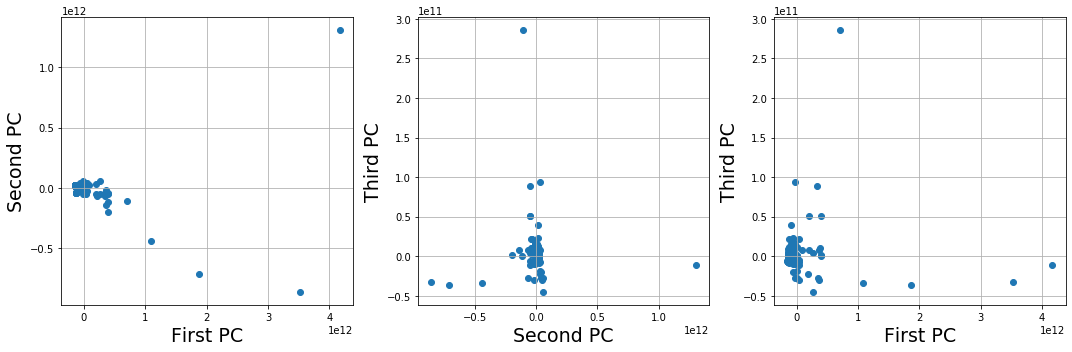

In [230]:
pca, data_pca, ex_var_ration = PCA(data=worldbank_data_wide_cnf1)
print("Ration [{:.3f} {:.3f} {:.3f} ]\t Weight of the three features: {:.3f}".format(*ex_var_ration, sum(ex_var_ration))) #YES WE HAVE THEEEEM

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].scatter(data_pca[:,0], data_pca[:,1])
ax[1].scatter(data_pca[:,1], data_pca[:,2])
ax[2].scatter(data_pca[:,0], data_pca[:,2])

ax[0].set_xlabel("First PC", fontsize=19)
ax[1].set_xlabel("Second PC", fontsize=19)
ax[2].set_xlabel("First PC", fontsize=19)

ax[0].set_ylabel("Second PC", fontsize=19)
ax[1].set_ylabel("Third PC", fontsize=19)
ax[2].set_ylabel("Third PC", fontsize=19)

for i in range(3):
    ax[i].grid(True)

fig.tight_layout()
plt.show()

#### 3/b. Scaled (Normalization)

Ration [0.655 0.208 0.137 ]	 Weight of the three features: 1.000


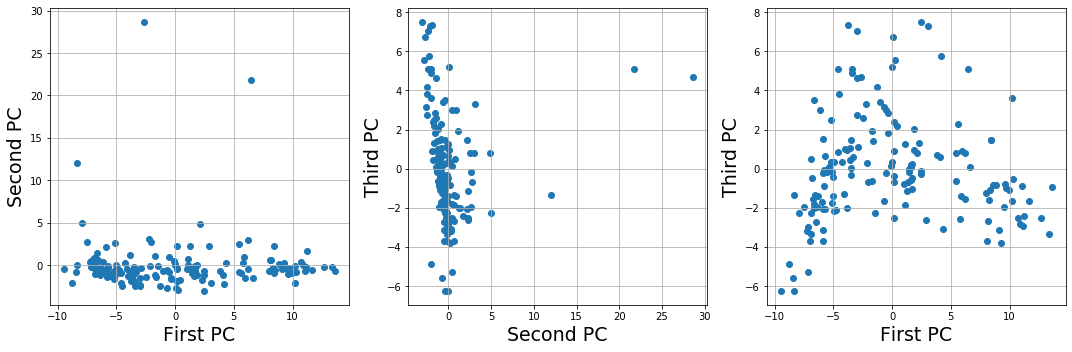

In [231]:
worldbank_wide_cnf1_norm = norm_data(worldbank_data_wide_cnf1)

pca_s, data_pca_s, ex_var_ration_s = PCA(data=worldbank_wide_cnf1_norm)
print("Ration [{:.3f} {:.3f} {:.3f} ]\t Weight of the three features: {:.3f}".format(*ex_var_ration_s, sum(ex_var_ration_s))) #YES WE HAVE THEEEEM

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].scatter(data_pca_s[:,0], data_pca_s[:,1])
ax[1].scatter(data_pca_s[:,1], data_pca_s[:,2])
ax[2].scatter(data_pca_s[:,0], data_pca_s[:,2])

ax[0].set_xlabel("First PC", fontsize=19)
ax[1].set_xlabel("Second PC", fontsize=19)
ax[2].set_xlabel("First PC", fontsize=19)

ax[0].set_ylabel("Second PC", fontsize=19)
ax[1].set_ylabel("Third PC", fontsize=19)
ax[2].set_ylabel("Third PC", fontsize=19)

for i in range(3):
    ax[i].grid(True)

fig.tight_layout()
plt.show()

OKEY! So a scaling could be very meaningful! And shows how impactful some features really are, due to some overshadowing. Let's see why this change exists! I moved the dict with upper, but i still have to get what it is...


In [295]:
pc_f_idx, pc_f = get_impactful_features(pca, features, 5)
pc_f = np.array(pc_f)

k = list(features.keys())
v = list(features.values())

for i in range(pc_f.shape[1]):
    print('{} : {}'.format(i,v[k.index(str(pc_f[1,i]))]))

0 : Employment in industry, male (% of male employment) (modeled ILO estimate)
1 : Employment in services, male (% of male employment) (modeled ILO estimate)
2 : Employment in agriculture, male (% of male employment) (modeled ILO estimate)
3 : Adolescent fertility rate (births per 1,000 women ages 15-19)
4 : Agriculture, value added (% of GDP)


So the second PC is related to employment rates... Not suprise that this is the second PC

<font size="4"> This is where I stop. Due to illness, I am much slower... </font>

-----
### 4. T-SNE
- Perform T-SNE on the scaled data with 2 components
- Plot the embeddings results. Add a text label for each point to make it possible to interpret the results. It will not be possible to read all, but try to make it useful, see the attached image as an example!
- Highlight Hungary, Greece, Norway, China, Russia (HUN, GRC, NOR, CHN, RUS)! Which countries are the closest one to Hungary and Greece?


-------
### 5. Hierarchical and K-Means clustering
- Perform hierarchical clustering on the filtered and scaled data (hint: use seaborn)
- Try to plot in a way that all country's name is visible
- Perform K-Means clustering on the filtered and scaled data with 4 clusters.
- Make a plot with text label for each point as in the previous excersice but use different color for every cluster.
- Write down your impressions that you got from these two plots! Which cluster are China and Hungary in?


----
### Hints:
- On total you can get 10 points for fully completing all tasks.
- Decorate your notebook with questions, explanation etc, make it self contained and understandable!
- Comment your code when necessary!
- Write functions for repetitive tasks!
- Use the pandas package for data loading and handling
- Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
- Use the scikit learn package for almost everything
- Use for loops only if it is really necessary!
- Code sharing is not allowed between students! Sharing code will result in zero points.
- If you use code found on web, it is OK, but, make its source clear!